## Objective: Data visualization of MNIST dataset using PCA.


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as s

In [2]:
#importing dataset
data_table = pd.read_csv('mnist_train.csv')
data_table.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
data_table.shape

(42000, 785)

In [4]:
#Separating Class label and features
label = data_table['label']
data = data_table.drop("label",axis=1)
label.head()
data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
print(data.shape)
print(label.shape)


(42000, 784)
(42000,)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


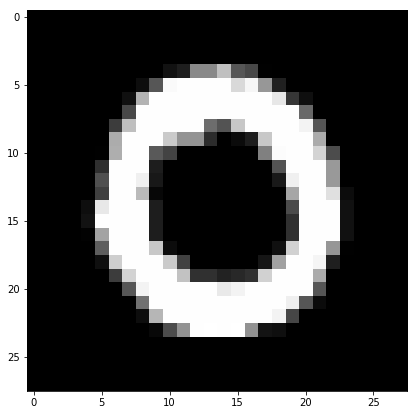

0


In [6]:
plt.figure(figsize=(7,7))
idx = 1

grid_data = data.iloc[idx].as_matrix().reshape(28,28)  # reshape from 1d to 2d pixel array
plt.imshow(grid_data, interpolation = "none", cmap = "gray")
plt.show()

print(label[idx])

In [7]:
#data preprocessing using Column standardization
from sklearn.preprocessing import StandardScaler
standard_data = StandardScaler().fit_transform(data)
print(standard_data.shape)

(42000, 784)


In [8]:
#Finding the covariance of a matrix which is A^T * A
sample_data = standard_data
#Matrix multiplication using Numpy
covar_matrix = (np.matmul(sample_data.T, sample_data)/len(label))
print("The shape of covariance matrix is" , covar_matrix.shape)

The shape of covariance matrix is (784, 784)


In [9]:
#Finding the top 2 Eigen vector and respective Eigen values for visualization
'''The eigh function returns Eigen values and vercors in ascending order. So we are taking the last two Eigen 
values and its corresponding vecotrs. As the first value index is o so, we are passing 782 and 783(last 2 highest values which 
covers maximum variance of all the features)'''
from scipy.linalg import eigh
values , vectors = eigh(covar_matrix , eigvals=(782,783))
#printing the shape of Eigen Vector
print('Shape of Eigen Vectors',vectors.shape)
#Transpose the vectors
vectors = vectors.T
#updated vector shape
print('Updated shape of the vecotr', vectors.shape)




Shape of Eigen Vectors (784, 2)
Updated shape of the vecotr (2, 784)


In [10]:
#Projecting the original data sample on the plane.
new_coordinates = np.matmul (vectors, sample_data.T)
print("Resultant new data points' shape ",vectors.shape,'X',sample_data.T.shape ,'=', new_coordinates.shape)

Resultant new data points' shape  (2, 784) X (784, 42000) = (2, 42000)


In [11]:
print(label.shape)

(42000,)


In [12]:
import pandas as pd
# appending label to the 2d projected data
new_coordinates = np.vstack((new_coordinates, label)).T

# creating a new data frame for ploting the labeled points.
dataframe = pd.DataFrame(data=new_coordinates, columns=("2nd_principal","1st_principal", "label"))
print(dataframe.head())

   2nd_principal  1st_principal  label
0      -5.226445      -5.140478    1.0
1       6.032996      19.292332    0.0
2      -1.705813      -7.644503    1.0
3       5.836139      -0.474207    4.0
4       6.024818      26.559574    0.0


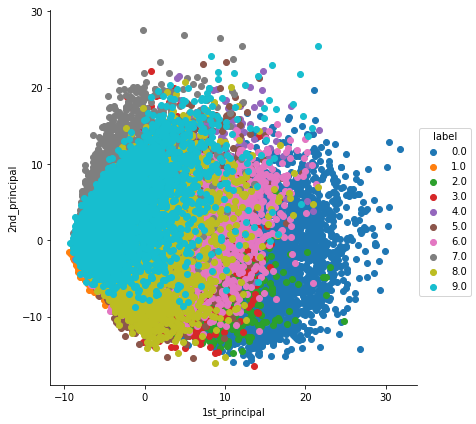

In [13]:
s.FacetGrid(dataframe, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

# PCA using Scikit-Learn

In [14]:
# initializing the pca
from sklearn import decomposition
pca = decomposition.PCA()


In [15]:
# configuring the parameteres
# the number of components = 2
pca.n_components = 2
pca_data = pca.fit_transform(sample_data)

# pca_reduced will contain the 2-d projects of simple data
print("shape of pca_reduced.shape = ", pca_data.shape)

shape of pca_reduced.shape =  (42000, 2)


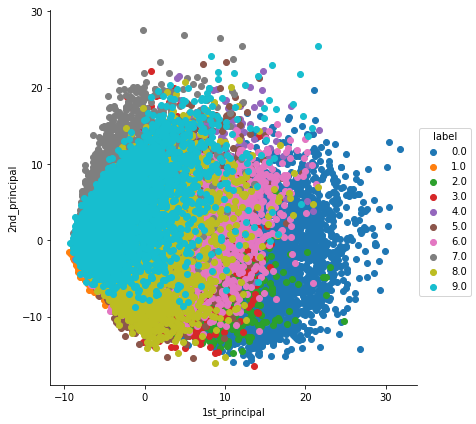

In [16]:
import pandas as pd
# attaching the label for each 2-d data point 
pca_data = np.vstack((pca_data.T, label)).T

# creating a new data fram which help us in ploting the result data
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "label"))
s.FacetGrid(pca_df, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

### Conclusion :

1. Here we can see that data points are overlapping to each other
2. we are not able to distinguish between points
3. We can comclude here that visualization using PCA is not good for this problem.